<a href="https://colab.research.google.com/github/ArvindRajen/Conceptual_Analysis/blob/main/Hotel_Reviews_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1 - **Exploratory Data Analysis**


In [4]:
import os, re, nltk, gensim
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

Importing the File using Pandas

In [5]:
print(os.listdir("/content"))
df = pd.read_csv('/content/Hotel_Reviews.csv')
df.head()

['.config', 'Hotel_Reviews.csv', 'sample_data']


,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [6]:
df.shape

(515738, 17)

Checking Possible Pair-Wise Correlations isn't the best way to check for multi-collinearity but it's a start 

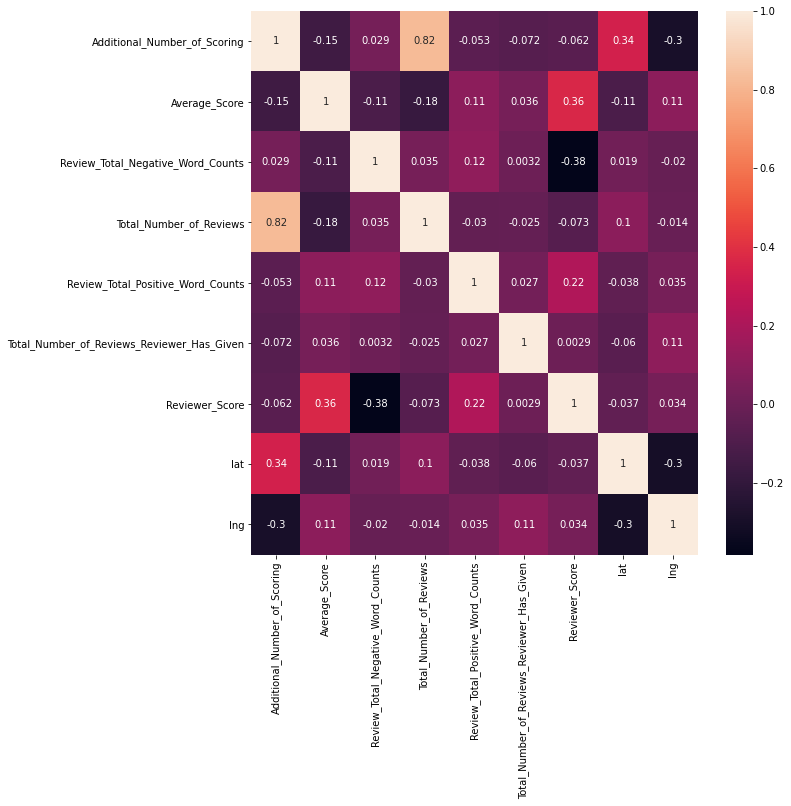

In [7]:
df.corr()

f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,ax=ax) 


First Review with heatmap; it can be seen that `Total_Number_of_Reviews` is **positively correlated** with `Additional_Number_of_Scoring` by looking at this we can understand that if hotels get more reviews it gets more scoring points and usually if people give positive reviews we can slightly guesstimate whether the hotel is good or not.

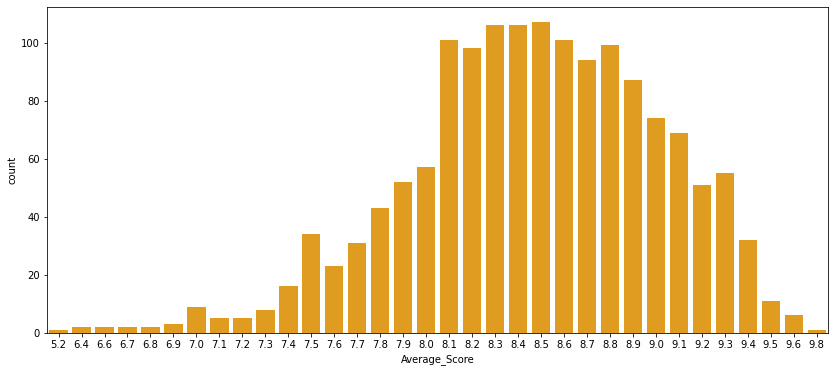

In [8]:
df_uni = df[['Hotel_Name','Average_Score']].drop_duplicates()
plt.figure(figsize = (14,6))
sns.countplot(x = 'Average_Score',data = df_uni,color = 'orange')

In [9]:
df.Average_Score.describe()

count    515738.000000
mean          8.397487
std           0.548048
min           5.200000
25%           8.100000
50%           8.400000
75%           8.800000
max           9.800000
Name: Average_Score, dtype: float64

We can see very clearly from the upper image and the table, most of reviews stay the rightside of 8.1. If a hotel's Avg_score is under 8.1, that means it only wins 25% competitors.

This is interesting as the average scores indicate that most reviews lie between 8 - 9, meaning that the hotels within the dataset are generally pretty good but we know that the human mind is a thing of many intricacies and words can sometimes convey a different meaning to when we use numbers.

In [10]:
df_tight=df[(df.Average_Score>=7.9) & (df.Average_Score<=9.1)]
df_tight.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
405,1 15 Templeton Place Earl s Court Kensington a...,244,8/3/2017,8.5,K K Hotel George,Ireland,Really nothing negative to say about this hotel,9,1831,Very comfortable beds smart bathroom good sho...,18,2,9.6,"[' Leisure trip ', ' Group ', ' Classic Twin R...",0 days,51.491888,-0.194971
406,1 15 Templeton Place Earl s Court Kensington a...,244,8/2/2017,8.5,K K Hotel George,United States of America,No coffee or tea in the room or lobby No one ...,52,1831,No Positive,0,1,7.1,"[' Leisure trip ', ' Couple ', ' Classic Twin ...",1 days,51.491888,-0.194971
407,1 15 Templeton Place Earl s Court Kensington a...,244,7/20/2017,8.5,K K Hotel George,United States of America,Room was pretty small for the three of us,11,1831,The staff was very friendly and helpful in or...,27,3,9.2,"[' Leisure trip ', ' Family with young childre...",14 days,51.491888,-0.194971
408,1 15 Templeton Place Earl s Court Kensington a...,244,7/19/2017,8.5,K K Hotel George,Australia,Nothing really,4,1831,We stayed at the hotel at a friend s recommen...,66,15,9.6,"[' Leisure trip ', ' Couple ', ' Classic Doubl...",15 days,51.491888,-0.194971
409,1 15 Templeton Place Earl s Court Kensington a...,244,7/18/2017,8.5,K K Hotel George,United States of America,Only cab service to airport is expensive comp...,16,1831,Super location on Division underground line d...,60,1,8.3,"[' Leisure trip ', ' Group ', ' Classic Twin R...",16 days,51.491888,-0.194971


We need to know how many hotels we are looking at :

In [11]:
print(df.Hotel_Name.nunique(), 'hotels in the dataset')

1492 hotels in the dataset


In [12]:
print(df.Reviewer_Nationality.nunique(), 'Nationalities of Reviewers in the dataset')

227 Nationalities of Reviewers in the dataset


How many of the Countries are part of the analysis.

In [13]:
df['State'] = df.Hotel_Address.apply(lambda x: x.split(' ')[-1]) 
print(df.Hotel_Name.nunique(), 'hotels belonging to', df.State.unique().size,'different Countries in the dataset')
print('Countries : ', df.State.unique())

1492 hotels belonging to 6 different Countries in the dataset
Countries :  ['Netherlands' 'Kingdom' 'France' 'Spain' 'Italy' 'Austria']


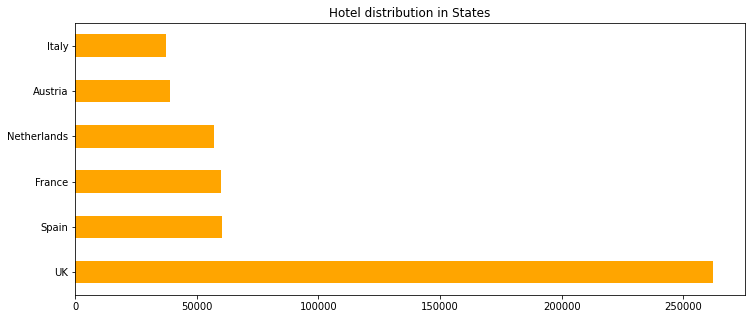

In [14]:
df.Hotel_Address = df.Hotel_Address.str.replace('United Kingdom','UK')
df['State'] = df.Hotel_Address.apply(lambda x: x.split(' ')[-1])
# Now we can check distribution in  and in state
plt.figure(figsize = (12,5))
plt.title('Hotel distribution in States')
df.State.value_counts().plot.barh(color = 'orange')

Now that we know there *1492* Hotels in the data set we now look at How many of the Hotels are distrubuted among the 6 countries. 

Let's define the popular hotels are above 8.8 Avg_score and those with the most no. of reviews.

In [15]:
#Top 10 Popular hotels
df[df.Average_Score >= 8.8][['Hotel_Name','Average_Score', 'Total_Number_of_Reviews',
                             'State']].drop_duplicates().sort_values(by ='Total_Number_of_Reviews',ascending = False)[:10]


,Hotel_Name,Average_Score,Total_Number_of_Reviews,State
404728,Glam Milano,8.8,7371,Italy
309843,Jaz Amsterdam,8.9,7108,Netherlands
327773,Ayre Hotel Gran V a,8.8,4887,Spain
57597,M by Montcalm Shoreditch London Tech City,9.1,4802,UK
450210,Hotel Esther a,9.1,4687,Netherlands
180550,citizenM Tower of London,9.1,4672,UK
370315,25hours Hotel beim MuseumsQuartier,8.8,4324,Austria
361190,Hilton London Wembley,8.8,4305,UK
14829,Intercontinental London The O2,9.4,4204,UK
470003,The Square Milano Duomo,9.0,4192,Italy


In [16]:
#Top 10 Unheard hotels
df[df.Average_Score >= 8.8][['Hotel_Name','Average_Score', 'Total_Number_of_Reviews',
                             'State']].drop_duplicates().sort_values(by ='Total_Number_of_Reviews',ascending = True)[:10]

,Hotel_Name,Average_Score,Total_Number_of_Reviews,State
250467,Hotel Daniel Paris,8.8,43,France
48780,The Henrietta Hotel,9.2,49,UK
122487,XO Hotel,8.9,49,France
191756,The Curtain,9.1,59,UK
78350,Splendide Royal Paris,9.4,59,France
89963,Hotel Dupond Smith,9.3,60,France
421548,Hotel Seven One Seven,8.8,61,Netherlands
346688,The Lanesborough,9.4,64,UK
71274,Drawing Hotel,8.9,67,France
275588,Room Mate Gerard,9.0,67,Spain


In [17]:
# find the best 10 hotels in Europe
df[(df.Average_Score >= 9.0)][['Hotel_Name','Average_Score', 'Total_Number_of_Reviews', 
                               'State']].drop_duplicates().sort_values(by ='Average_Score',ascending = False)[:10]

,Hotel_Name,Average_Score,Total_Number_of_Reviews,State
54717,Ritz Paris,9.8,122,France
176997,H tel de La Tamise Esprit de France,9.6,166,France
398945,Hotel The Serras,9.6,604,Spain
185602,41,9.6,244,UK
316447,Hotel Casa Camper,9.6,732,Spain
402244,H10 Casa Mimosa 4 Sup,9.6,454,Spain
14708,Haymarket Hotel,9.6,255,UK
341657,Waldorf Astoria Amsterdam,9.5,443,Netherlands
291408,Taj 51 Buckingham Gate Suites and Residences,9.5,310,UK
176748,The Soho Hotel,9.5,385,UK


In [18]:
# find the worst 10 hotels
df[(df.Average_Score <= 8.1)][['Hotel_Name','Average_Score','Total_Number_of_Reviews',
                               'State']].drop_duplicates().sort_values(by ='Average_Score',ascending = True)[:10]

,Hotel_Name,Average_Score,Total_Number_of_Reviews,State
494791,Hotel Liberty,5.2,465,Italy
323302,Savoy Hotel Amsterdam,6.4,995,Netherlands
242324,Hotel Cavendish,6.4,2275,UK
157843,Best Western Maitrise Hotel Edgware Road,6.6,461,UK
129781,The Tophams Hotel,6.6,411,UK
204614,Commodore Hotel,6.7,2400,UK
485009,Ibis Styles Milano Palmanova,6.7,207,Italy
130789,Bloomsbury Palace Hotel,6.8,2751,UK
68936,Villa Eugenie,6.8,165,France
375953,Hallmark Hotel London Chigwell Prince Regent,6.9,747,UK


In [19]:
df_com = df[['Hotel_Name','Reviewer_Score','Negative_Review','Review_Total_Negative_Word_Counts',
             'Positive_Review','Review_Total_Positive_Word_Counts',
             'Total_Number_of_Reviews','Total_Number_of_Reviews_Reviewer_Has_Given']]

##**Mining for Words in Text Docs**

##Why Lemmatization?

Lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, often leading to incorrect meanings and spelling errors.

In [20]:
# Creating machine learning environment

stop_words = set(stopwords.words('english'))
wordnet_lemmatizer = WordNetLemmatizer()

#NLP prepross neg and pos reviews
neg = []
for i in df_com['Negative_Review']:
    letters = re.sub('[^a-zA-Z]',' ',i)
    tokens = nltk.word_tokenize(letters)
    lowercase = [l.lower() for l in tokens]
    filtered_result = list(filter(lambda l: l not in stop_words, lowercase))
    lemmas = [wordnet_lemmatizer.lemmatize(t) for t in filtered_result] 
    neg.append(' '.join(lemmas))

pos = []
for j in df_com['Positive_Review']:
    pletters = re.sub('[^a-zA-Z]',' ',j)
    ptokens = nltk.word_tokenize(pletters)
    plowercase = [l.lower() for l in ptokens]
    filtered_presult = list(filter(lambda l: l not in stop_words, plowercase))
    plemmas = [wordnet_lemmatizer.lemmatize(t) for t in filtered_presult] 
    pos.append(' '.join(plemmas))   

In [52]:
print(pos[1])

real complaint hotel great great location surroundings room amenity service two recommendation however firstly staff upon check confusing regarding deposit payment staff offer upon checkout refund original payment make new one bit confusing secondly site restaurant bit lacking well thought excellent quality food anyone vegetarian vegan background even wrap toasted sandwich option would great aside minor minor thing fantastic spot back return amsterdam


In [51]:
#Finding most important words in Negative Reviews and in Postive Reviews
cv = CountVectorizer(analyzer = 'word',stop_words = 'english',max_features = 20,ngram_range=(2,2))
most_negative_words = cv.fit_transform(neg)
temp_counts = most_negative_words.sum(axis=0)
temp_words = cv.vocabulary_
print('the most important words in Negative Reviews:')
print('--------------------------------------------')
display(temp_words)

print('                                          ')
cv = CountVectorizer(analyzer = 'word',stop_words = 'english',max_features = 20,ngram_range=(2,2))
most_positive_words = cv.fit_transform(pos)
temp1_counts = most_positive_words.sum(axis=0)
temp1_words = cv.vocabulary_
print('the most important words in Positive Reviews:')
print('--------------------------------------------')
temp1_words

the most important words in Negative Reviews:
--------------------------------------------


{'air conditioning': 0,
 'bit small': 1,
 'booking com': 2,
 'breakfast expensive': 3,
 'breakfast included': 4,
 'breakfast room': 5,
 'double bed': 6,
 'double room': 7,
 'hotel room': 8,
 'little bit': 9,
 'mini bar': 10,
 'room bit': 11,
 'room little': 12,
 'room room': 13,
 'room service': 14,
 'room small': 15,
 'small room': 16,
 'star hotel': 17,
 'tea coffee': 18,
 'wi fi': 19}

                                          
the most important words in Positive Reviews:
--------------------------------------------


{'bed comfortable': 0,
 'breakfast good': 1,
 'clean room': 2,
 'comfortable bed': 3,
 'comfortable room': 4,
 'comfy bed': 5,
 'excellent location': 6,
 'friendly helpful': 7,
 'friendly staff': 8,
 'good breakfast': 9,
 'good location': 10,
 'great location': 11,
 'helpful staff': 12,
 'location excellent': 13,
 'location good': 14,
 'location great': 15,
 'room clean': 16,
 'staff friendly': 17,
 'staff helpful': 18,
 'walking distance': 19}

Now, we roughly know reasons of positive review and negative review. Some words appear many times. We can dig deeper.


In [22]:
# define and make a neg-rate
# Use the neg-rate to evaluate a hotel's management

df_com['+'] = 1
df_com['-'] = 1
df_com['+'] = df_com.apply(lambda x: 0 if x["Positive_Review"] == 'No Positive' else x['+'],axis =1)
df_com['-'] = df_com.apply(lambda x: 0 if x["Negative_Review"] == 'No Negative' else x['-'],axis =1)
counted_reviews = pd.DataFrame(df_com.groupby(['Hotel_Name'])['+','-','Total_Number_of_Reviews_Reviewer_Has_Given'].sum())
counted_reviews['Total'] = counted_reviews['+'] +counted_reviews['-']
counted_reviews['Neg_rate'] = round(counted_reviews['-'] / counted_reviews['Total'],2)
counted_reviews['Neg_rate'].describe()

counted_reviews[counted_reviews.Neg_rate > 0.5]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,+,-,Total_Number_of_Reviews_Reviewer_Has_Given,Total,Neg_rate
Hotel_Name,,,,,
AC Hotel Irla a Marriott Lifestyle Hotel,12,13,148,25,0.52
BEST WESTERN Maitrise Hotel Maida Vale,695,732,5023,1427,0.51
Best Western Maitrise Hotel Edgware Road,175,203,901,378,0.54
Britannia International Hotel Canary Wharf,4099,4262,22855,8361,0.51
Gran Hotel Barcino,66,73,385,139,0.53
Hallmark Hotel London Chigwell Prince Regent,384,415,2319,799,0.52
Hotel Liberty,51,64,395,115,0.56
Ibis Styles Milano Palmanova,9,11,37,20,0.55
Idea Hotel Milano San Siro,393,419,4132,812,0.52


#Part 2

In [23]:
# read data
reviews_df = pd.read_csv("/content/Hotel_Reviews.csv")
# append the positive and negative text reviews
reviews_df["review"] = reviews_df["Negative_Review"] + reviews_df["Positive_Review"]
# create the label
reviews_df["is_bad_review"] = reviews_df["Reviewer_Score"].apply(lambda x: 1 if x < 7 else 0)
# select only relevant columns
reviews_df = reviews_df[["review", "is_bad_review"]]
reviews_df.head()

,review,is_bad_review
0,I am so angry that i made this post available...,1
1,No Negative No real complaints the hotel was g...,0
2,Rooms are nice but for elderly a bit difficul...,0
3,My room was dirty and I was afraid to walk ba...,1
4,You When I booked with your company on line y...,1


In [24]:
reviews_df = reviews_df.sample(frac = 0.1, replace = False, random_state=42)
reviews_df["review"] = reviews_df["review"].apply(lambda x: x.replace("No Negative", "").replace("No Positive", ""))


In [25]:
# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
reviews_df["review_clean"] = reviews_df["review"].apply(lambda x: clean_text(x))

In [26]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
reviews_df["sentiments"] = reviews_df["review"].apply(lambda x: sid.polarity_scores(x))
reviews_df = pd.concat([reviews_df.drop(['sentiments'], axis=1), reviews_df['sentiments'].apply(pd.Series)], axis=1)

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [27]:
# add number of characters column
reviews_df["nb_chars"] = reviews_df["review"].apply(lambda x: len(x))

# add number of words column
reviews_df["nb_words"] = reviews_df["review"].apply(lambda x: len(x.split(" ")))

In [28]:
# create doc2vec vector columns
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(reviews_df["review_clean"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = reviews_df["review_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
reviews_df = pd.concat([reviews_df, doc2vec_df], axis=1)

In [29]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(reviews_df["review_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = reviews_df.index
reviews_df = pd.concat([reviews_df, tfidf_df], axis=1)

In [30]:
reviews_df.head()

,review,is_bad_review,review_clean,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4,word_abbey,word_ability,word_abit,word_able,word_abroad,word_abrupt,word_absence,word_absolute,word_absolutely,word_abundant,word_ac,word_accept,word_acceptable,word_acces,word_access,word_accessibility,word_accessible,word_accessory,word_accident,word_accidentally,word_accommodate,word_accommodating,word_accommodation,word_accomodate,word_accomodating,word_accomodation,...,word_wonderfully,word_wont,word_wood,word_wooden,word_word,word_work,word_worked,word_worker,word_working,word_workout,word_world,word_worn,word_worried,word_worry,word_worse,word_worst,word_worth,word_worthy,word_would,word_wouldnt,word_wow,word_write,word_wrong,word_xmas,word_xx,word_yard,word_year,word_yell,word_yellow,word_yes,word_yet,word_yoghurt,word_yogurt,word_young,word_yr,word_yummy,word_zero,word_ziggo,word_zone,word_zuid
488440,Would have appreciated a shop in the hotel th...,0,would appreciate shop hotel sell drinking wate...,0.049,0.617,0.334,0.9924,599,113,0.061780,0.198190,-0.305746,-0.017266,-0.071531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.249614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274649,No tissue paper box was present at the room,0,tissue paper box present room,0.216,0.784,0.000,-0.2960,44,10,-0.081090,0.092126,-0.008870,0.047073,-0.061908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
374688,Pillows Nice welcoming and service,0,pillow nice welcome service,0.000,0.345,0.655,0.6908,36,7,0.065367,0.075714,-0.045814,0.016792,0.068438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
404352,Everything including the nice upgrade The Hot...,0,everything include nice upgrade hotel revamp s...,0.000,0.621,0.379,0.9153,155,27,0.025041,-0.044675,-0.031963,0.062551,0.021424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
451596,Lovely hotel v welcoming staff,0,lovely hotel welcome staff,0.000,0.230,0.770,0.7717,32,7,-0.039076,0.123407,0.098141,-0.040361,0.076197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
reviews_df.shape

(51574, 3840)

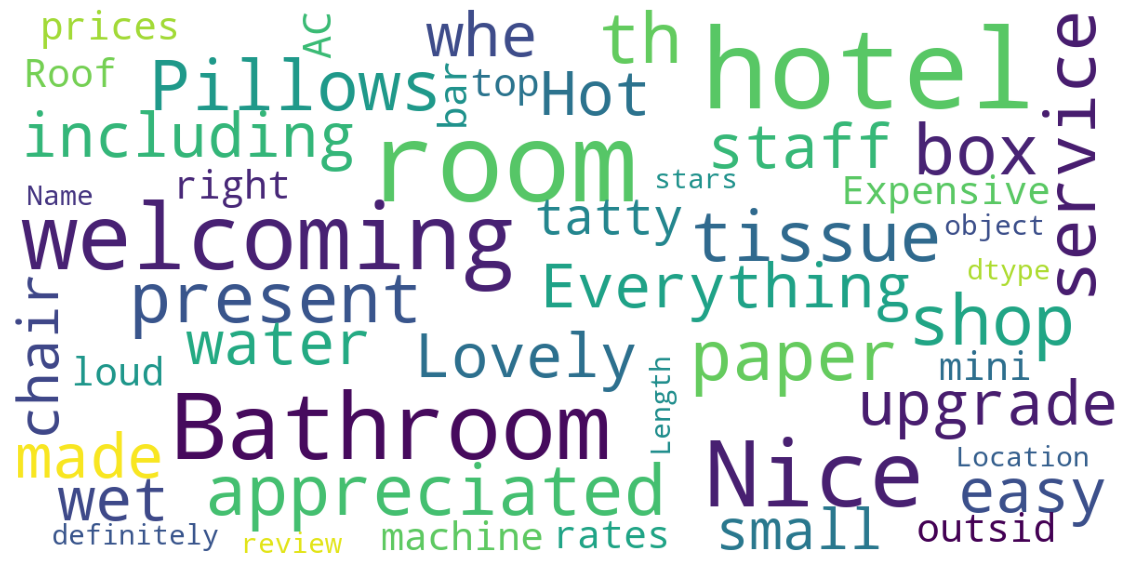

In [32]:
# show is_bad_review distribution
reviews_df["is_bad_review"].value_counts(normalize = True)

# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(reviews_df["review"])

In [33]:
# highest positive sentiment reviews (with more than 5 words)
reviews_df[reviews_df["nb_words"] >= 5].sort_values("pos", ascending = False)[["review", "pos"]].head(10)

,review,pos
43101,A perfect location comfortable great value,0.931
211742,Clean comfortable lovely staff,0.907
175551,Friendly welcome Comfortable room,0.905
365085,Good location great value,0.904
109564,Clean friendly and comfortable,0.902
145743,Good value amazing location,0.901
407590,breakfast excellent Clean comfort,0.899
407546,Great place I enjoyed,0.881
218571,Beautiful Quirky Comfortable,0.878
436901,Lovely comfortable rooms,0.877


In [34]:
# lowest negative sentiment reviews (with more than 5 words)
reviews_df[reviews_df["nb_words"] >= 5].sort_values("neg", ascending = False)[["review", "neg"]].head(10)

,review,neg
193086,No dislikes LOCATION,0.831
356368,Nothing Great helpful wonderful staff,0.812
318516,A disaster Nothing,0.804
458794,Nothing Excellent friendly helpful staff,0.799
29666,A bit noisy No,0.796
426057,Dirty hotel Smells bad,0.762
263187,Very bad service No,0.758
443796,Nothing perfect,0.750
181508,Window blind was broken,0.744
175316,Nothing Super friendly staff,0.743


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


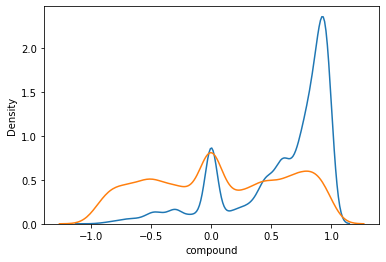

In [35]:
# plot sentiment distribution for positive and negative reviews

import seaborn as sns

for x in [0, 1]:
    subset = reviews_df[reviews_df['is_bad_review'] == x]
    
    # Draw the density plot
    if x == 0:
        label = "Good reviews"
    else:
        label = "Bad reviews"
    sns.distplot(subset['compound'], hist = False, label = label)

In [36]:
# feature selection
label = "is_bad_review"
ignore_cols = [label, "review", "review_clean"]
features = [c for c in reviews_df.columns if c not in ignore_cols]

# split the data into train and test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reviews_df[features], reviews_df[label], test_size = 0.20, random_state = 42)

In [37]:
# train a random forest classifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

,feature,importance
3,compound,0.047991
2,pos,0.044161
0,neg,0.034539
1,neu,0.023107
9,doc2vec_vector_3,0.020163
10,doc2vec_vector_4,0.019821
6,doc2vec_vector_0,0.019561
4,nb_chars,0.017199
8,doc2vec_vector_2,0.016202
7,doc2vec_vector_1,0.015947


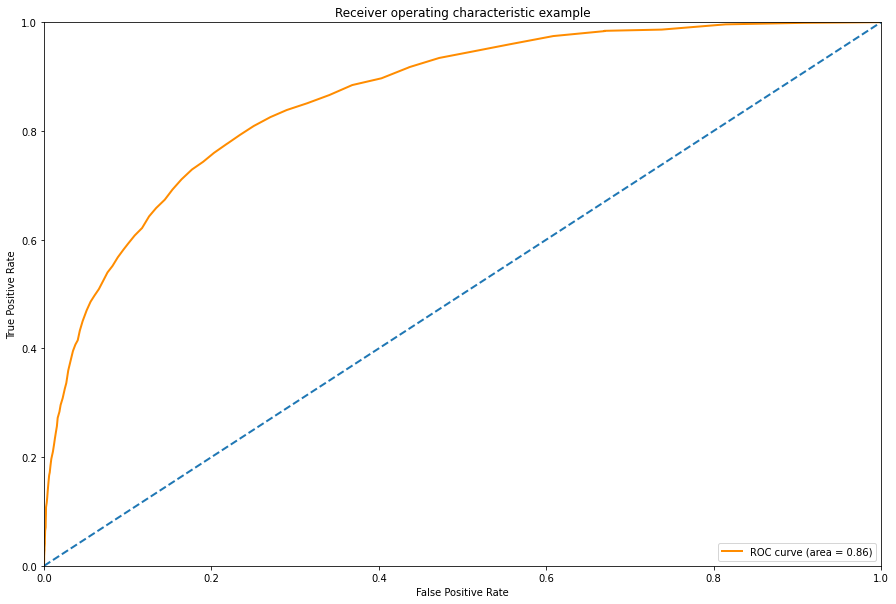

In [38]:
# ROC curve

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

#Part 3 - LIME - Explaining the model annd summarizing context.

In [42]:
!pip install lime

In [43]:
from tqdm import tqdm

from lime import lime_tabular
from lime.lime_text import LimeTextExplainer

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report

##Model Explanation With Traditional Machine Learning

In the first set of experiments, we try using statsitical ML to understand how LIME assigns importance to features to explain the model

LIME (Local Interpretable Model-Agnostic Explanations)

LIME is model-agnostic, meaning that it can be applied to any machine learning model. The technique attempts to understand the model by perturbing the input of data samples and understanding how the predictions change.

Many of the state of the art machine learning models are functionally black boxes, as it is nearly impossible to get a feeling for its inner workings. This brings us to a question of trust: do I trust that a certain prediction from the model is correct? Or do I even trust that the model is making reasonable predictions in general? 

It seems intuitive that explaining the rationale behind individual predictions would make us better positioned to trust or mistrust the prediction, or the classifier as a whole. Even if we can't necessarily understand how the model behaves on all cases, it may be possible (and indeed it is in most cases) to understand how it behaves in particular cases.

In [57]:
explainer = LimeTextExplainer(
    class_names = ['negative', 'positive'],
    bow=True
  )

cv = CountVectorizer(analyzer = 'word',stop_words = 'english',max_features = 20,ngram_range=(2,2))
text = cv.fit_transform(pos)


In [63]:
word2idx = reviews_df['review_clean'].to_dict()
idx2word = {value: key for key, value in word2idx.items()}

In [75]:
def idxes2string(idx_list, idx2word):
  """
  Converts a list like [2,44,67] to string like 'How are you' where the three words map to the three numbers

  --params:
    --idx_list: list(int) [list of indexes of words in the sentence]
    --idx2word: dict. keys=int, values=str. Unique mapping of indexes to words

  --returns:
    -- str
  """
  return " ".join([idx2word[idx] for idx in idx_list])

In [76]:
def prediction(sentence, vectorizer=cv, model=rf):
  x_input = vectorizer.transform(sentence).toarray()
  return model.predict_proba(x_input)

In [99]:
# i = 10
# text = idxes2string(X_test[i], idx2word)
# label = y_test[i]

# print("Text: \n",text)
# print("-"*100)
# print("Label: ", "negative" if label==0 else "positive")